In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [3]:
data = pd.read_csv('weatherYerevan_2014-2019.csv')

In [4]:
data.head()

,dt,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1388534400,2014-01-01 00:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,0,0,75,803,Clouds,broken clouds,4
1,1388538000,2014-01-01 01:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,0,176,75,701,Mist,mist,50n
2,1388541600,2014-01-01 02:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,1,0,75,701,Mist,mist,50n
3,1388545200,2014-01-01 03:00:00 +0000 UTC,263.15,263.15,263.15,1027,85,2,0,75,701,Mist,mist,50n
4,1388548800,2014-01-01 04:00:00 +0000 UTC,262.15,262.15,262.15,1028,85,2,0,75,701,Mist,mist,50d


In [16]:
#Create data index
ts = pd.period_range('2014-01-01 00:00:00', periods=36244, freq='H')
data['Date'] = ts
data.set_index('Date', inplace=True)

In [10]:
data.dt_iso[0]

'2014-01-01 00:00:00 +0000 UTC'

In [14]:
data.dt_iso.head()

0    2014-01-01 00:00:00 +0000 UTC
1    2014-01-01 01:00:00 +0000 UTC
2    2014-01-01 02:00:00 +0000 UTC
3    2014-01-01 03:00:00 +0000 UTC
4    2014-01-01 04:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [17]:
data.head()

,dt,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
Date,,,,,,,,,,,,,,
2014-01-01 00:00,1388534400,2014-01-01 00:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,0,0,75,803,Clouds,broken clouds,4
2014-01-01 01:00,1388538000,2014-01-01 01:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,0,176,75,701,Mist,mist,50n
2014-01-01 02:00,1388541600,2014-01-01 02:00:00 +0000 UTC,263.15,263.15,263.15,1027,78,1,0,75,701,Mist,mist,50n
2014-01-01 03:00,1388545200,2014-01-01 03:00:00 +0000 UTC,263.15,263.15,263.15,1027,85,2,0,75,701,Mist,mist,50n
2014-01-01 04:00,1388548800,2014-01-01 04:00:00 +0000 UTC,262.15,262.15,262.15,1028,85,2,0,75,701,Mist,mist,50d


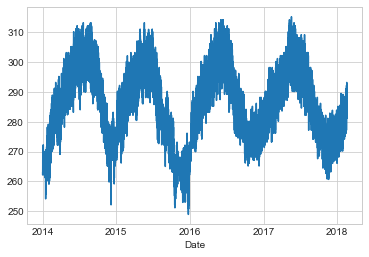

In [69]:
# Temperature plot
data.temp.plot()
plt.show()

In [19]:
# First 3 lags of temp
data['lag_temp1'] = data['temp'].shift(1)
data['lag_temp2'] = data['temp'].shift(2)
data['lag_temp3'] = data['temp'].shift(3)

In [38]:
data['weather_main'] = data.weather_main.astype('category')

In [20]:
# Import the linear regression from statsmodels
import statsmodels.api as sm

In [21]:
# drop columns and nan values
data.dropna(inplace=True)

In [77]:
# Prepare target and input variables.
X1_multi=data.drop(['temp', 'dt', 'dt_iso', 'weather_id', 'weather_main', 'weather_description', 'weather_icon', 'lag_temp3', 'clouds_all', 'temp_min', 'temp_max'], axis=1)
Y_target=data.temp

In [78]:
# Add the costant to our input variables
X1_multi=sm.tools.tools.add_constant(X1_multi, prepend=True, has_constant='skip')

In [81]:
# OLS Regression (Model with 2 lags)
model = sm.OLS(Y_target, X1_multi)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.792e+05
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        12:47:17   Log-Likelihood:                -72460.
No. Observations:               36241   AIC:                         1.449e+05
Df Residuals:                   36234   BIC:                         1.450e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7354      0.468     22.958      0.000       9.819      11.652
pressure       0.0030      0.000     11.303      0.000       0.002       0.004
humidity      -0.0227      0.001    -39.789      0.000      -0.024      -0.022
wind_speed    -0.0871      0.006    -15.376      0.000      -0.098      -0.076
wind_deg      -0.0006    8.5e-05     -7.615      0.000      -0.001      -0.000
lag_temp1      1.1575      0.005    221.040      0.000       1.147       1.168
lag_temp2     -0.2003      0.005    -39.354      0.000      -0.210      -0.190
==============================================================================
Omnibus:                     5632.560   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101852.921
Skew:                           0.068   Prob(JB):                         0.00
Kurtosis:                      11.212   Cond. No.                     5.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

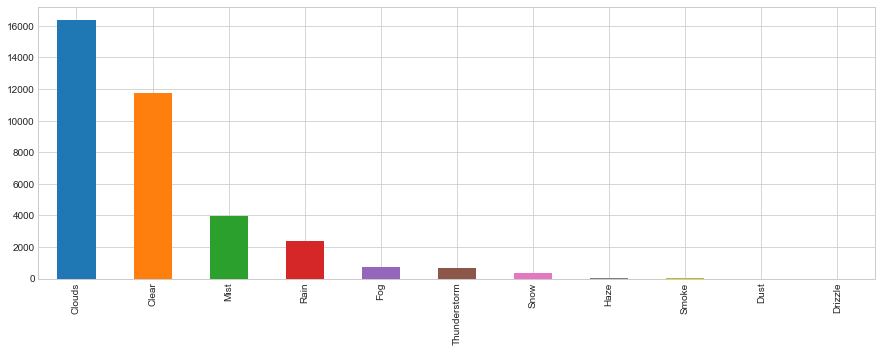

In [7]:
data.weather_main.value_counts().plot(kind='bar', figsize=(15,5))
plt.show()

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

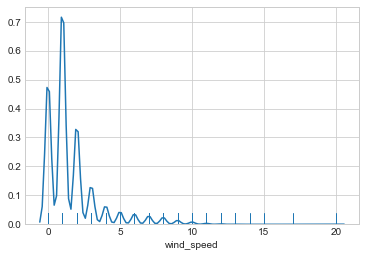

In [95]:
sns.distplot(data.wind_speed, hist=False, rug=True);

Text(0,0.5,'FVC')

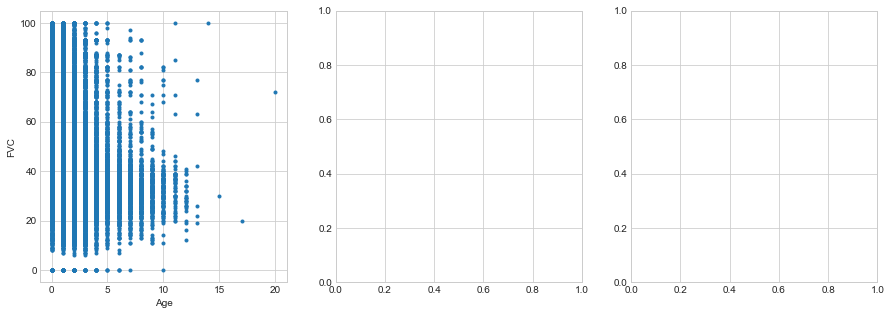

In [94]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].plot(data.wind_speed, data.humidity, linestyle='none', marker='.')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('FVC')